# Paper Figures
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 1/28/2022|

In [1]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
# from numba import jit
import numpy as np

# DDD

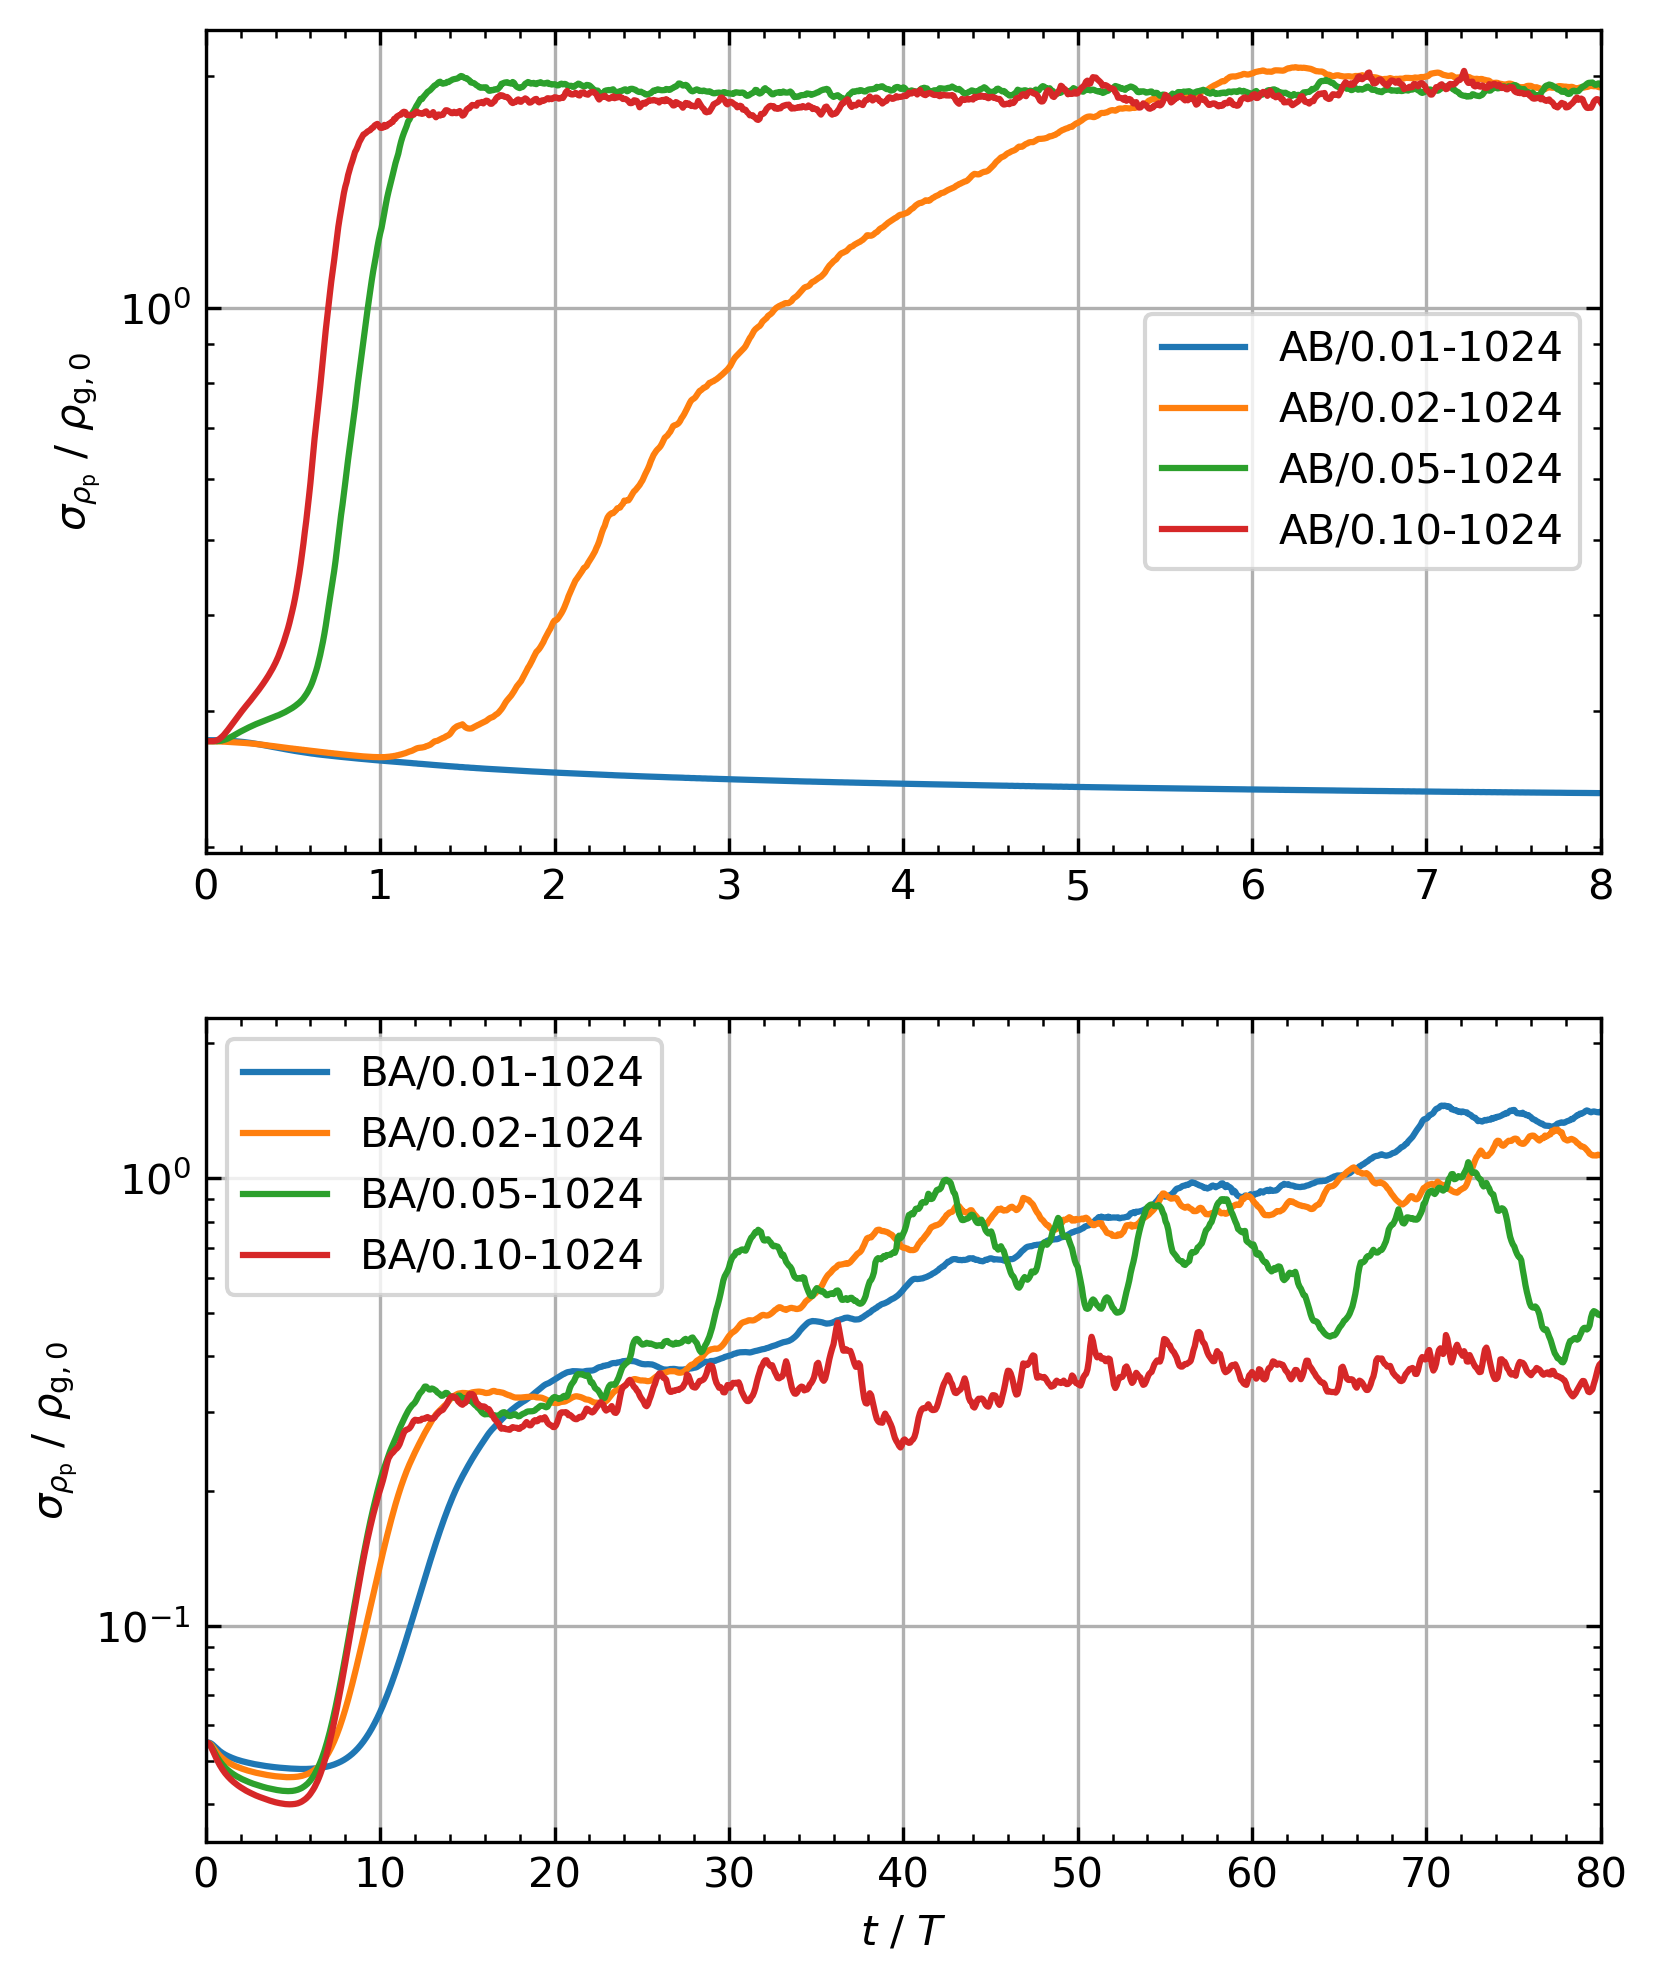

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), dpi=300)
runs = ['AB', 'BA']
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '2048'
# xlims = [(0, 8), (0, 80)]

for i,run in enumerate(runs):
    for Pi in Pis:
        hst = athena_read.hst('../nonlinear/Pi/%s/%s/%s/output/SI.hst'%(run, Pi, res))
        rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
        axs[i].semilogy(times, rhop_amps, label='$\Pi=$'+Pi)
    axs[i].grid()
    axs[i].legend()
    axs[i].minorticks_on()
    axs[i].set(ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')#, xlim=xlims[i])
    axs[i].tick_params(axis='both', which='both', top=True, right=True)

axs[1].set(xlabel=r'$t$ / $T$')
# plt.savefig('figs/growth.pdf', bbox_inches='tight', pad_inches=0.01)

# CPDD

Tasks:
 - [ ] Try pruning the data beforehand with Numba and store in multidimensional array.
 - [ ] Then use `@jit(forceobj=True)` to plot (if needed)

KeyboardInterrupt: 

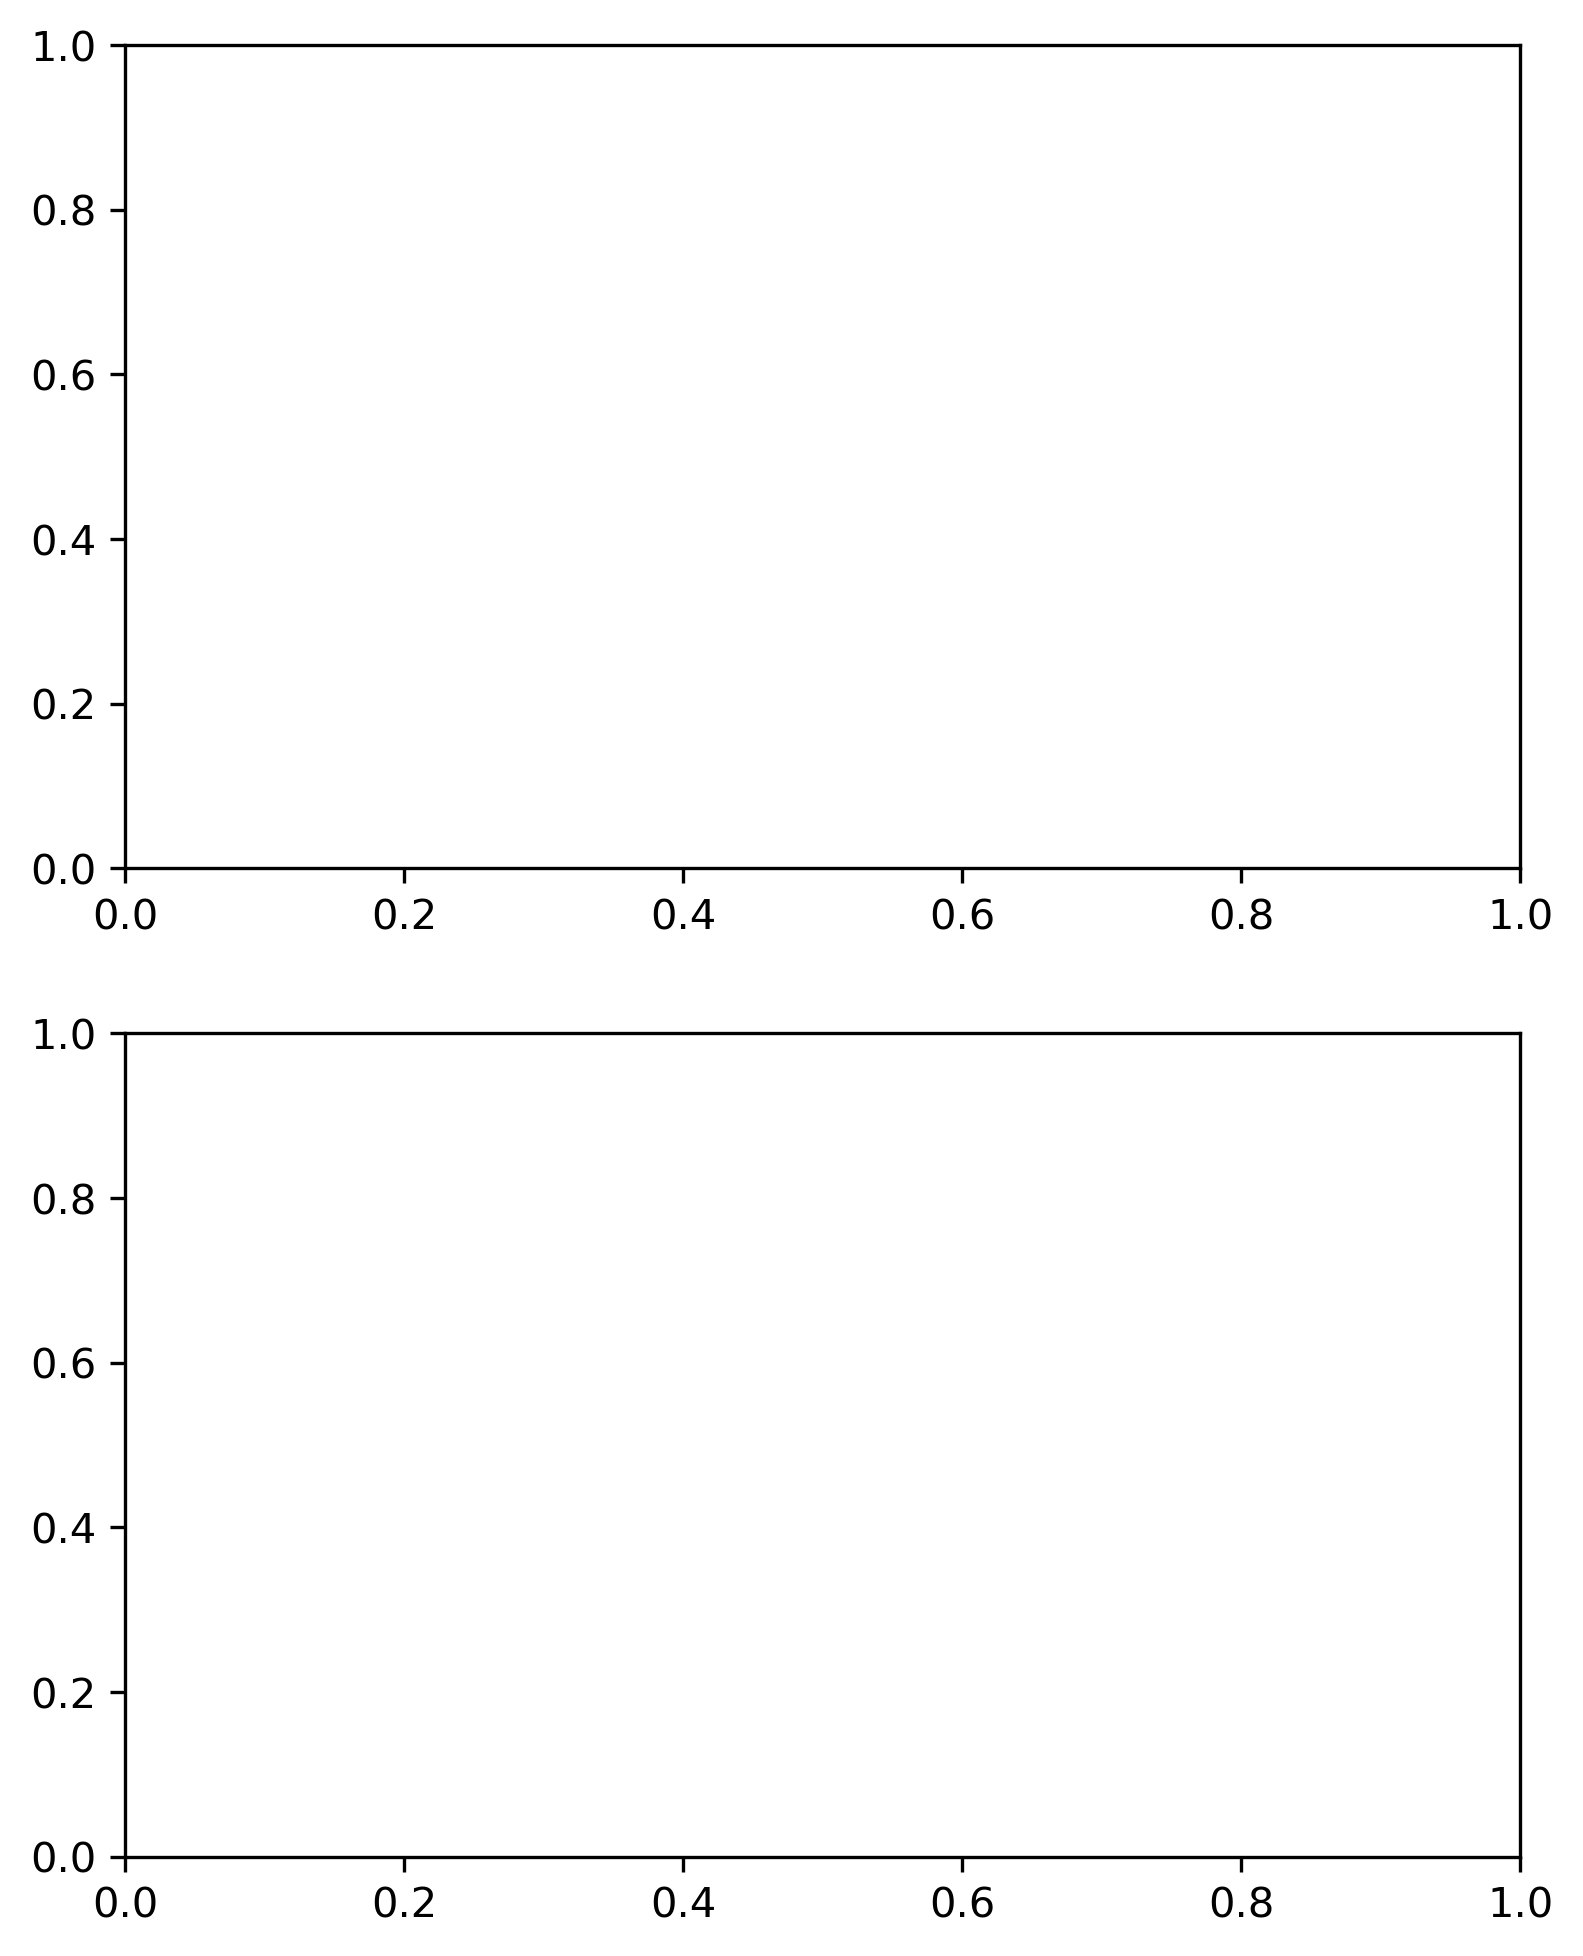

In [61]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), dpi=300)
runs = [['AB/0.02-1024', 'AB/0.05-1024', 'AB/0.10-1024'],
        ['BA/0.01-1024', 'BA/0.02-1024', 'BA/0.05-1024', 'BA/0.10-1024']]
xlims = [(1e-1, 1e2), (0.1, 3e3)]
ylims = [(8e-7, 1), (8e-7, 1)]
indices = -1*np.logspace(0, 20, num=1000, base=2, dtype=int)

for i,ax in enumerate(axs.flat):
    for run in runs[i]:
        with np.load('../nonlinear/Pi/%s/output/cpdd.npz'%run) as data:
            avgs = np.asarray([data['avgs'][i] for i in indices])
            cdf = np.asarray([data['cdf'][i] for i in indices])
            stds = np.asarray([data['stds'][i] for i in indices])
            ax.loglog(avgs, cdf, label=run)
            ax.fill_betweenx(cdf, avgs/stds, avgs*stds, alpha=0.2)
    ax.set(xlim=xlims[i], ylim=ylims[i], ylabel=r'P$(>\rho_p)$')
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
    ax.legend()
    ax.grid()

axs[1].set(xlabel=r'$\rho_p$ / $\langle \rho_p \rangle$')
plt.savefig('figs/cpdd.pdf', bbox_inches='tight', pad_inches=0.01)

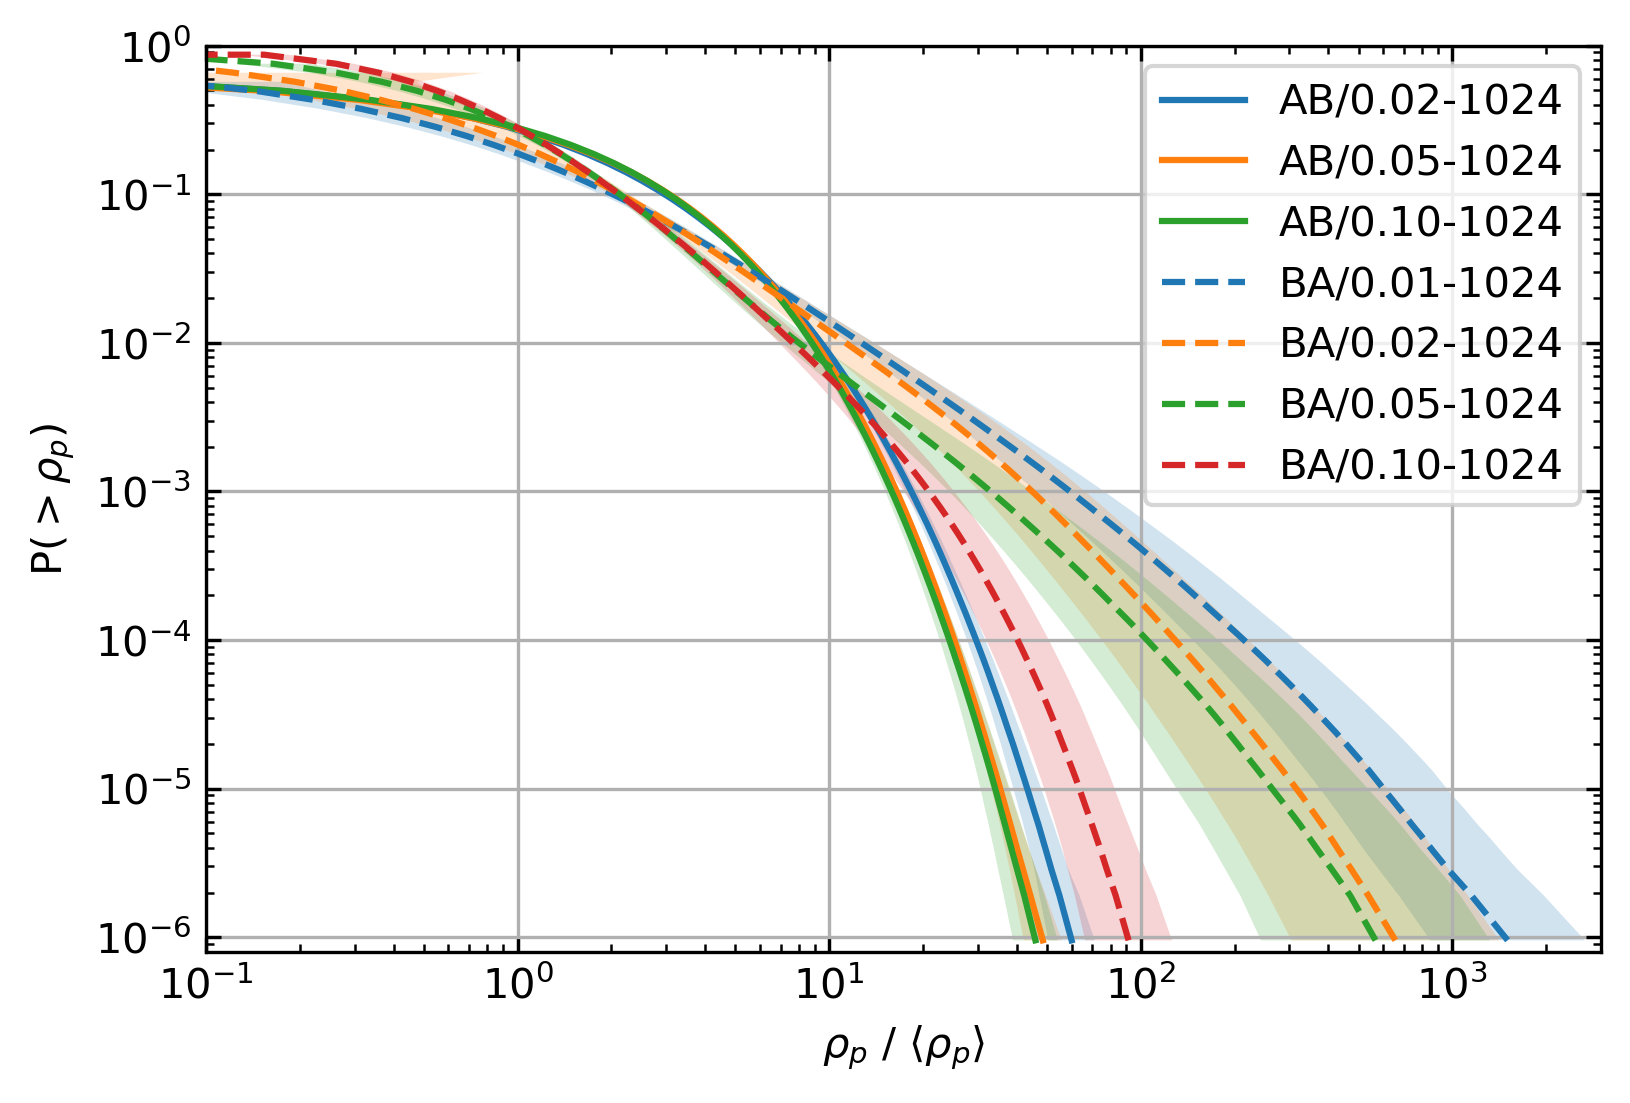

In [59]:
fig, ax = plt.subplots(dpi=300)
runs = [[['AB/0.02-1024', 'AB/0.05-1024', 'AB/0.10-1024'], 'solid'],
        [['BA/0.01-1024', 'BA/0.02-1024', 'BA/0.05-1024', 'BA/0.10-1024'], 'dashed']]
indices = -1*np.logspace(0, 20, num=1000, base=2, dtype=int)

for i in range(2):
    for run in runs[i][0]:
        with np.load('../nonlinear/Pi/%s/output/cpdd.npz'%run) as data:
                avgs = np.asarray([data['avgs'][i] for i in indices])
                cdf = np.asarray([data['cdf'][i] for i in indices])
                stds = np.asarray([data['stds'][i] for i in indices])
                ax.loglog(avgs, cdf, ls=runs[i][1], label=run)
                ax.fill_betweenx(cdf, avgs/stds, avgs*stds, alpha=0.2)
    plt.gca().set_prop_cycle(None)

ax.set(xlim=(0.1, 3e3), ylim=(8e-7, 1), ylabel=r'P$(>\rho_p)$',
                xlabel=r'$\rho_p$ / $\langle \rho_p \rangle$')
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.legend()
ax.grid()

plt.savefig('figs/cpdd2.pdf', bbox_inches='tight', pad_inches=0.01)

# Tasks

- [ ] Include Riemann solver in § 2.1.

```bash
sbaronet@r305i0n14:~/athena-dust$ ./configure.py --prob=streaming_instability -p --eos=isothermal --nghost=3 -hdf5 -h5double -mpi --cxx=icpc -mpi --mpiccmd="icpc -lmpi -lmpi++" --cflag="-axCORE-AVX512,CORE-AVX2 -xAVX"
Your Athena++ distribution has now been configured with the following options:
  Problem generator:          streaming_instability
  Coordinate system:          cartesian
  Equation of state:          isothermal
  Riemann solver:             hlle
  Magnetic fields:            OFF
  Number of scalars:          0
  Special relativity:         OFF
  General relativity:         OFF
  Frame transformations:      OFF
  Particles:                  ON
  Self-Gravity:               OFF
  Super-Time-Stepping:        OFF
  Debug flags:                OFF
  Code coverage flags:        OFF
  Linker flags:                 -lhdf5
  Floating-point precision:   double
  Number of ghost cells:      3
  MPI parallelism:            ON
  OpenMP parallelism:         OFF
  FFT:                        OFF
  HDF5 output:                ON
  HDF5 precision:             double
  Compiler:                   icpc
  Compilation command:        icpc -lmpi -lmpi++  -O3 -std=c++11 -ipo -xhost -inline-forceinline -qopenmp-simd -qopt-prefetch=4 -qoverride-limits -diag-disable 3180 -axCORE-AVX512,CORE-AVX2 -xAVX
```